# Homework
You are given a dataset containing information about 1600 red wines (winequality.csv) containing 11 attributes and assignment to one of the three wine quality classess: "poor", "medium" and "good".
- Perform a preprocessing of this dataset (normalization, standardization).
- Divide this set into the train and test sets.
- Choose experimentally the best value of k (using cross-validation).
- Perform classification using the k-nn algoritm with the chosen k value.

Write a report containing information about the used preprocessing methods,
- chosen train/test split method (percentage of examples in train/test sets, if shuffling or stratification used), plot of the accuracy depending of k parameter, finally chosen k and obtained classification accuracy on a test set.

**Deadline +2 weeks**



In [108]:
import numpy as np
import sklearn.model_selection as skm
import sklearn.preprocessing as skp
import sklearn.neighbors as skn
import pandas as pd

def read_data(path: str) -> pd.DataFrame:
  return pd.read_csv(path)

def preprocess_df(df: pd.DataFrame) -> pd.DataFrame:
  df = df.sample(frac=1).reset_index(drop=True)
  classes = df['quality']
  df = df.drop('quality', axis=1)

  normalized_df = skp.MinMaxScaler().fit_transform(df)
  return normalized_df, classes.values

def split_df(data_X, data_Y, test_percent=0.2, random_state=5) -> (
    (pd.DataFrame, list[str]), (pd.DataFrame, list[str])):
  (X_train, X_test, Y_train, Y_test) = skm.train_test_split(
    data_X, data_Y, test_size=test_percent, random_state=random_state
  )
  return ((X_train, Y_train), (X_test, Y_test))

wine_df = read_data("resources/winequality-red.csv")

In [109]:
def calculate_cross_acc(k: int):
  classifier = skn.KNeighborsClassifier(n_neighbors=k)
  classifier.fit(*train_split)

  return np.mean(skm.cross_val_score(classifier, *test_split))


items = []
for _ in range(100):
  (train_split, test_split) = split_df(*preprocess_df(wine_df))

  accuracies_pairs = tuple(
    enumerate(map(calculate_cross_acc, range(1, 100 + 1)), start=1)
  )
  items.append(accuracies_pairs)
averages = tuple(map(lambda x: np.average(x, axis=0), zip(*items)))


Best score for k=31 with 59.69% accuracy


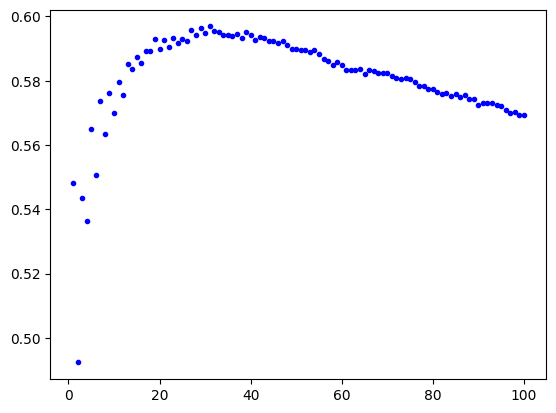

In [110]:
import matplotlib.pyplot as plt

plt.plot(*zip(*averages), 'bo', markersize=3)

(best_k, score) = max(averages, key=lambda x: x[1])
print(f"Best score for k={int(best_k)} with {score * 100:.2f}% accuracy")
